In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
# from qiskit.quantum_info import Operator

In [71]:
# parameters
n = 5
reverse = False # Whether we want the state of b to maintain orginal

In [72]:
def full_adder_1bit(qc, a, b, c_in, c_out):
    qc.ccx(a, b, c_out)
    qc.cx(a, b)
    qc.ccx(b, c_in, c_out)
    qc.cx(b, c_in)
    # Reverse back the state of b
    global reverse
    if reverse == True:
        qc.cx(a, b)

In [73]:
def full_adder_nbit(qc, A, B, C):
    global n
    for i in range(n):
        full_adder_1bit(qc, A[i], B[i], C[i], C[i+1])

In [78]:
# create random number
import random
import numpy as np
a = random.randint(0, 2**n-1)
b = random.randint(0, 2**n-1)
print("a is", a, "; b is", b, "; a+b should be", a+b)
a_b = b * 2**n + a # This is the place where (a,b) is in statevector
# state = [0 for _ in range(2**(3*n+1))]
# state[a_b] = 1
state = np.zeros(2**(3*n+1), dtype=complex)
state[a_b] = 1
# print(state)

a is 31 ; b is 11 ; a+b should be 42


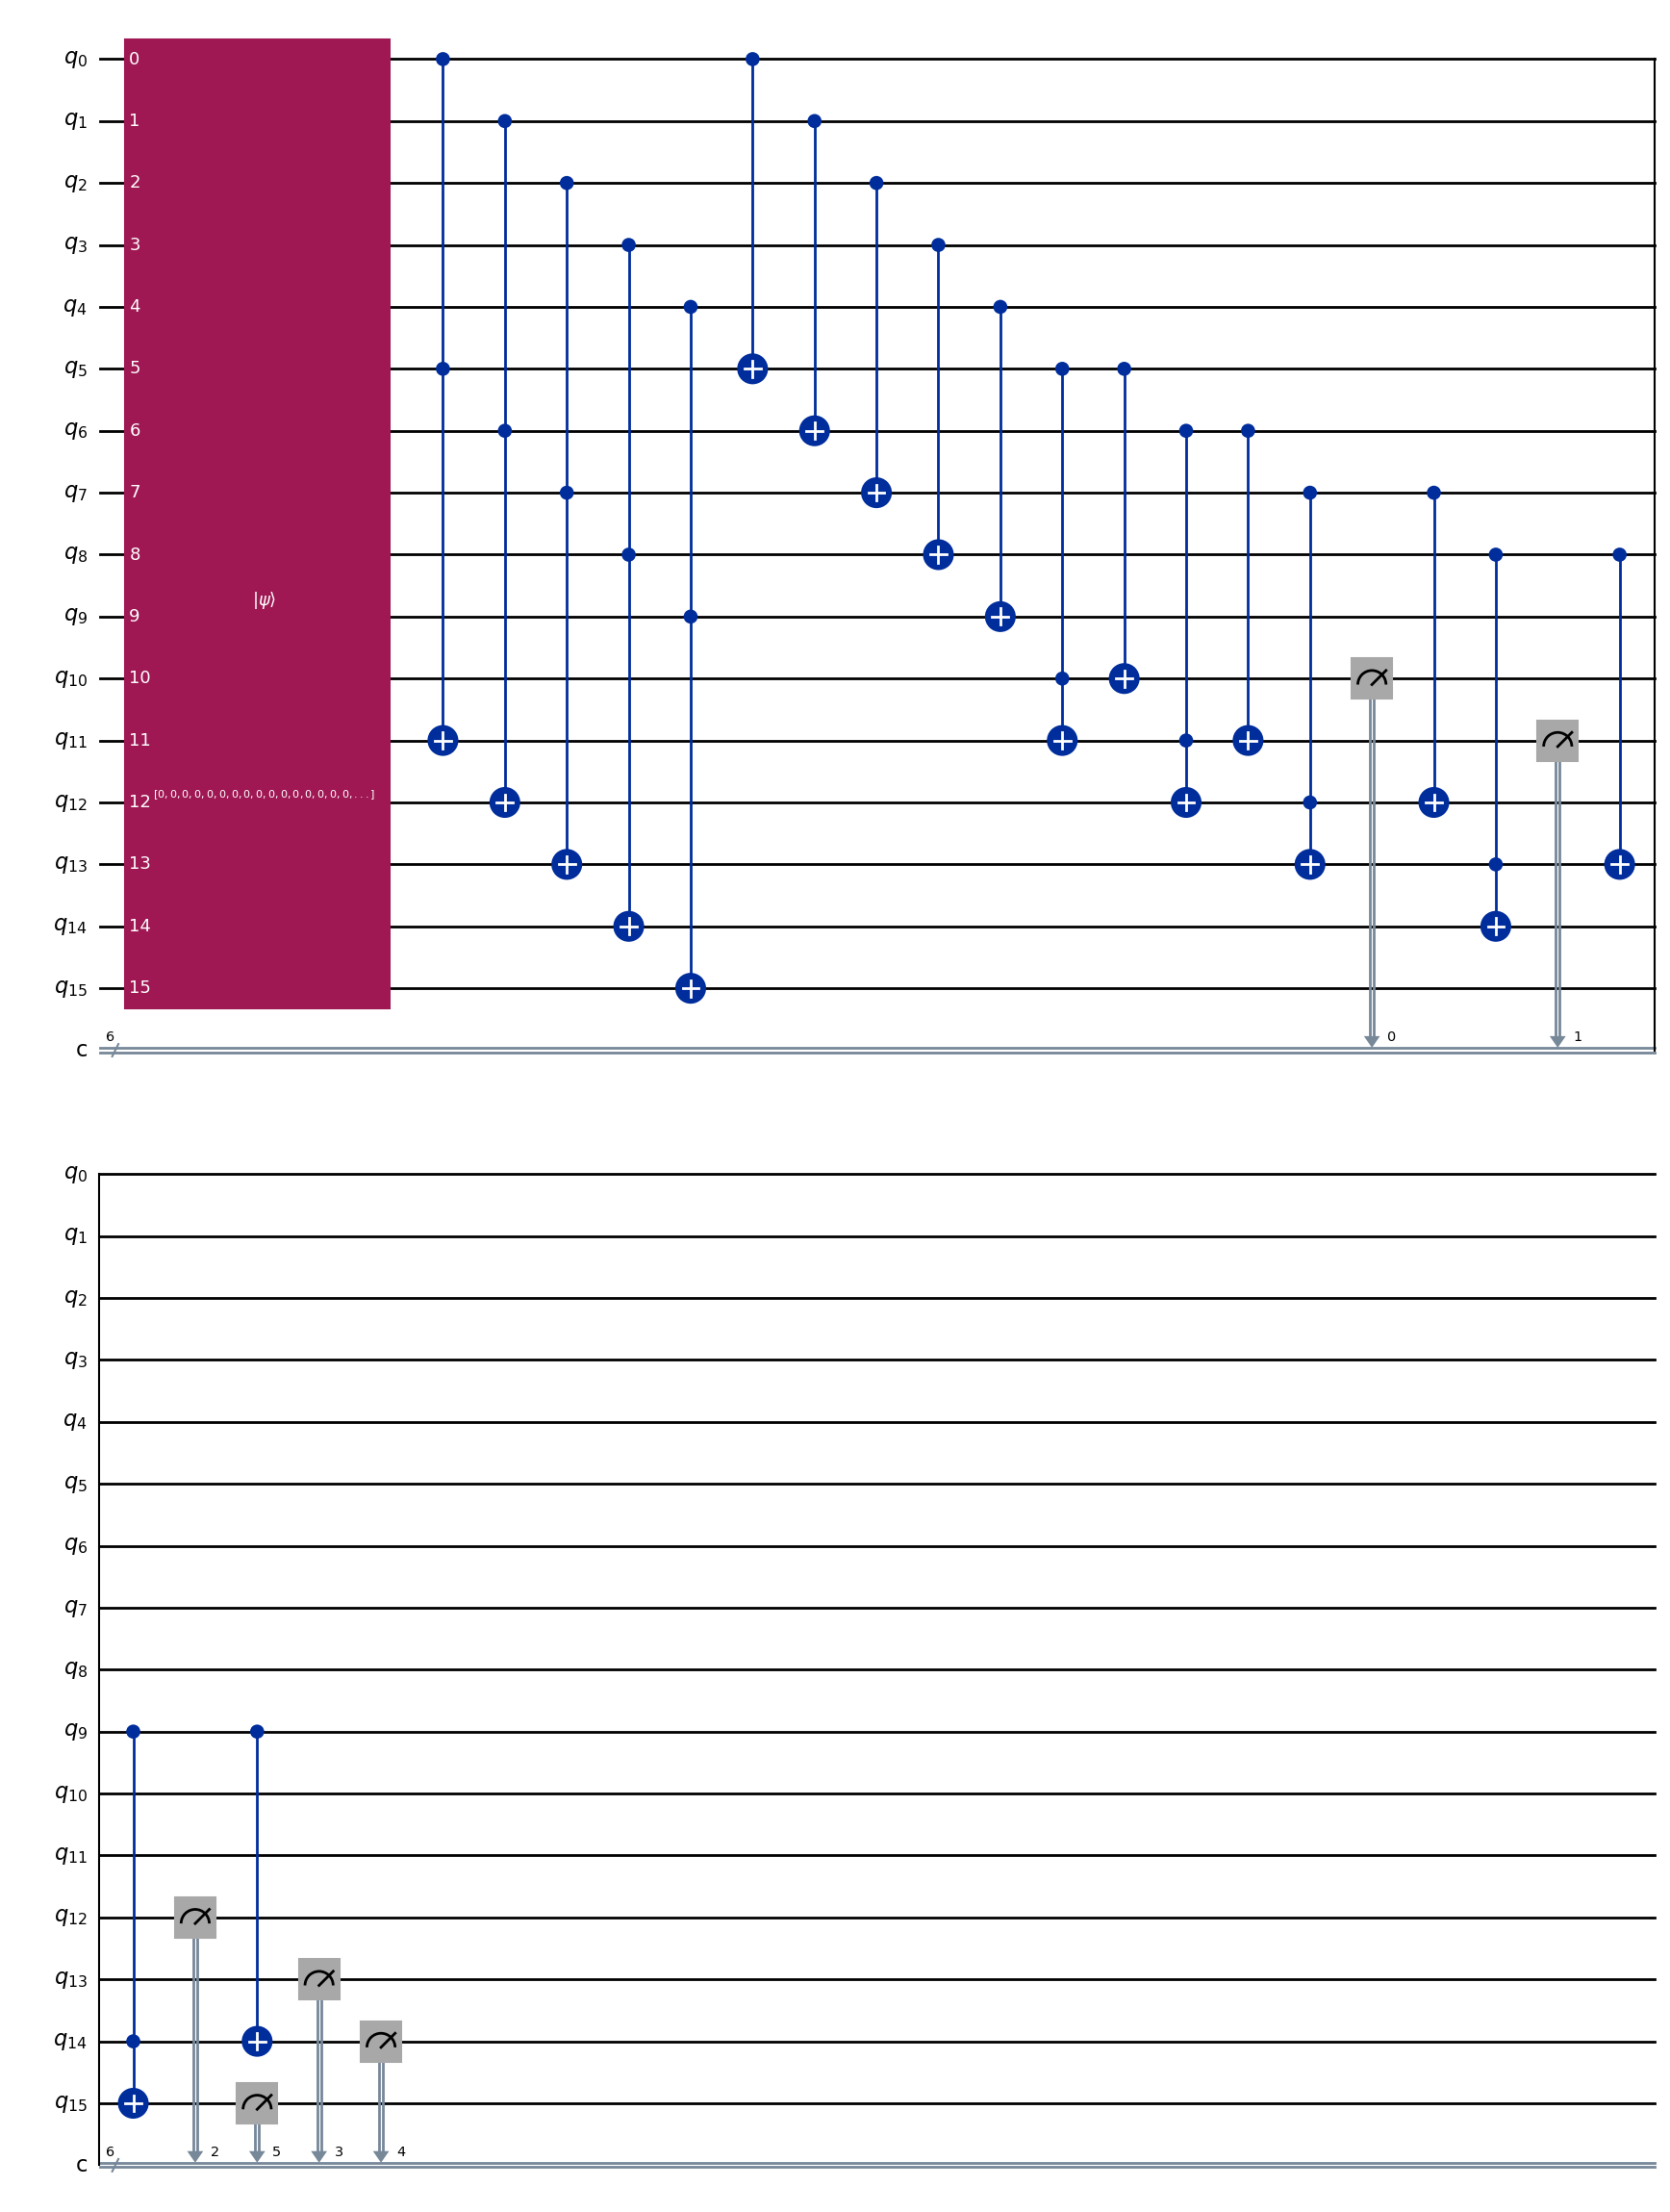

In [88]:
qc = QuantumCircuit(3*n+1, n+1)
A = list(range(n))
B = list(range(n, 2*n))
C = list(range(2*n, 3*n+1))

qc.initialize(state)
full_adder_nbit(qc, A, B, C)
measures = range(2*n, 3*n+1)
cbits = range(n+1)
qc.measure(measures, cbits)
qc.draw("mpl")
# Initialization

In [84]:
# sim = AerSimulator(method="automatic")
sim = AerSimulator(method="statevector")
qc_t = transpile(qc, sim)
# result = sim.run(qc_t, initial_statevector=state, shots=1).result()
result = sim.run(qc_t, shots=1).result()
# print(result)
counts = result.get_counts()
print("The result is:", counts)
binary_str = list(counts.keys())[0]
answer = int(binary_str, 2)
print("Given (a, b) are:(", a, ",", b, ")")
print("The answer of a+b is:", answer)

The result is: {'101010': 1}
Given (a, b) are:( 31 , 11 )
The answer of a+b is: 42
